### 다중 선형 회귀 (Multivariable Linear Regression)

앞에서는 x가 1개인 단순 선형 회귀였다면 이번 챕터는 다수의 x로부터 y를 예측한다.

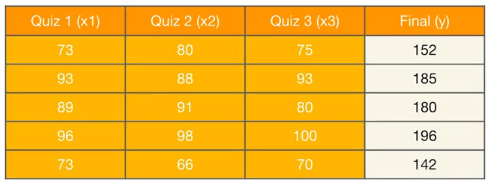

H(x) = w1x1 + w2x2 + x3x3 + b

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [2]:
torch.manual_seed(1)

In [5]:
# train data
x1_train = torch.FloatTensor([[73], [93], [89], [96], [73]])
x2_train = torch.FloatTensor([[80], [88], [89], [96], [66]])
x3_train = torch.FloatTensor([[75], [93], [90], [100], [70]])
y_train = torch.FloatTensor([[152], [185], [180], [196], [142]])

In [10]:
# initialize Weights and bias
w1 = torch.zeros(1, requires_grad = True)
w2 = torch.zeros(1, requires_grad = True)
w3 = torch.zeros(1, requires_grad = True)
b = torch.zeros(1, requires_grad = True)

0.0


In [11]:
# optimizer 설정
optimizer = optim.SGD([w1, w2, w3, b], lr = 1e-5)
EPOCHS = 1000

for epoch in range(EPOCHS + 1):
    
    # H(x) 계산
    hypothesis = x1_train * w1 + x2_train * w2 + x3_train * w3 + b
    
    # cost 계산
    cost = torch.mean((hypothesis - y_train) ** 2)
    
    # cost로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
    
    if epoch % 100 == 0:
        print('Epoch {:4d}  w1 : {:.3f} w2 : {:.3f} w3 : {:.3f} b : {:.3f} Cost : {:.6f} '.format( epoch, w1.item(), w2.item(), w3.item(), b.item(), cost.item()))

Epoch    0  w1 : 0.294 w2 : 0.291 w3 : 0.297 b : 0.003 Cost : 29661.800781 
Epoch  100  w1 : 0.677 w2 : 0.660 w3 : 0.681 b : 0.008 Cost : 0.835456 
Epoch  200  w1 : 0.681 w2 : 0.655 w3 : 0.681 b : 0.008 Cost : 0.797544 
Epoch  300  w1 : 0.684 w2 : 0.651 w3 : 0.682 b : 0.008 Cost : 0.761447 
Epoch  400  w1 : 0.688 w2 : 0.646 w3 : 0.683 b : 0.008 Cost : 0.727060 
Epoch  500  w1 : 0.692 w2 : 0.642 w3 : 0.683 b : 0.008 Cost : 0.694316 
Epoch  600  w1 : 0.696 w2 : 0.638 w3 : 0.684 b : 0.008 Cost : 0.663144 
Epoch  700  w1 : 0.699 w2 : 0.634 w3 : 0.684 b : 0.008 Cost : 0.633457 
Epoch  800  w1 : 0.703 w2 : 0.630 w3 : 0.685 b : 0.008 Cost : 0.605174 
Epoch  900  w1 : 0.706 w2 : 0.626 w3 : 0.685 b : 0.008 Cost : 0.578241 
Epoch 1000  w1 : 0.709 w2 : 0.622 w3 : 0.685 b : 0.008 Cost : 0.552596 


### 벡터와 행렬 연산으로 바꾸기

위에서는 x가 3개여서 일일히 선언해줄 수 있었지만 x 개수가 많아진다면 힘들 것이다.

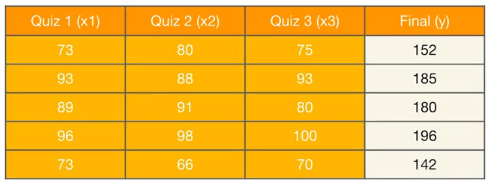

In [12]:
x_train = torch.FloatTensor([[73, 80, 75],
                            [93, 88, 93],
                            [89, 91, 80],
                            [96, 98, 100],
                            [73, 66, 70]])

y_train = torch.FloatTensor([[152], [185], [180], [196], [142]])

In [13]:
print(x_train.shape)
print(y_train.shape)

torch.Size([5, 3])
torch.Size([5, 1])


- 각각 (5x3), (5x1) 행렬의 크기를 가지므로 Weight는 (3x1)로 선언해주면 된다.

In [14]:
W = torch.zeros((3,1), requires_grad = True)
b = torch.zeros(1, requires_grad = True)

In [16]:
optimizer = optim.SGD([W,b], lr=1e-5)

In [21]:
EPOCHS = 20

for epoch in range(EPOCHS + 1):
    
    hypothesis = x_train.matmul(W) + b
    
    cost = torch.mean((hypothesis - y_train) ** 2)
    
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
    
    print('Epoch {:4d} hypothesis : {} Cost : {:.6f}'.format(epoch, hypothesis.squeeze().detach(), cost.item()))

Epoch    0 hypothesis : tensor([154.0457, 185.0971, 175.8145, 198.5794, 141.2212]) Cost : 5.794464
Epoch    1 hypothesis : tensor([154.0456, 185.0968, 175.8156, 198.5788, 141.2212]) Cost : 5.791949
Epoch    2 hypothesis : tensor([154.0454, 185.0965, 175.8166, 198.5782, 141.2213]) Cost : 5.789460
Epoch    3 hypothesis : tensor([154.0453, 185.0962, 175.8177, 198.5777, 141.2213]) Cost : 5.786971
Epoch    4 hypothesis : tensor([154.0451, 185.0959, 175.8187, 198.5771, 141.2214]) Cost : 5.784457
Epoch    5 hypothesis : tensor([154.0450, 185.0956, 175.8198, 198.5765, 141.2215]) Cost : 5.781975
Epoch    6 hypothesis : tensor([154.0448, 185.0954, 175.8208, 198.5759, 141.2215]) Cost : 5.779482
Epoch    7 hypothesis : tensor([154.0447, 185.0951, 175.8219, 198.5753, 141.2216]) Cost : 5.776971
Epoch    8 hypothesis : tensor([154.0445, 185.0948, 175.8229, 198.5748, 141.2216]) Cost : 5.774490
Epoch    9 hypothesis : tensor([154.0443, 185.0945, 175.8239, 198.5742, 141.2217]) Cost : 5.771992
Epoch   10